In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import imgaug.augmenters as iaa

In [134]:
# Load the data into a DataFrame
data = pd.read_csv('/content/sample_data/data.csv')

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     498 non-null    int64  
 1   studentPopulation        498 non-null    int64  
 2   medianBaseSalary         491 non-null    float64
 3   studentFacultyRatio      498 non-null    int64  
 4   totalStudentPop          498 non-null    int64  
 5   undergradPop             498 non-null    int64  
 6   totalGrantAid            495 non-null    float64
 7   percentOfStudentsFinAid  495 non-null    float64
 8   percentOfStudentsGrant   495 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.1 KB


In [136]:
# Drop rows with missing values
data.dropna(axis=0, inplace=True)

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 497
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     490 non-null    int64  
 1   studentPopulation        490 non-null    int64  
 2   medianBaseSalary         490 non-null    float64
 3   studentFacultyRatio      490 non-null    int64  
 4   totalStudentPop          490 non-null    int64  
 5   undergradPop             490 non-null    int64  
 6   totalGrantAid            490 non-null    float64
 7   percentOfStudentsFinAid  490 non-null    float64
 8   percentOfStudentsGrant   490 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 38.3 KB


In [138]:
# Convert all columns to float
for column in data.columns:
    if (column != 'rank'):
        data[column] = data[column].astype(float)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 497
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     490 non-null    int64  
 1   studentPopulation        490 non-null    float64
 2   medianBaseSalary         490 non-null    float64
 3   studentFacultyRatio      490 non-null    float64
 4   totalStudentPop          490 non-null    float64
 5   undergradPop             490 non-null    float64
 6   totalGrantAid            490 non-null    float64
 7   percentOfStudentsFinAid  490 non-null    float64
 8   percentOfStudentsGrant   490 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 38.3 KB


In [140]:
data.head(10)

,rank,studentPopulation,medianBaseSalary,studentFacultyRatio,totalStudentPop,undergradPop,totalGrantAid,percentOfStudentsFinAid,percentOfStudentsGrant
0,1,12195.0,173700.0,3.0,12195.0,4582.0,35299332.0,75.0,60.0
1,2,20961.0,173500.0,4.0,20961.0,8464.0,51328461.0,70.0,55.0
2,2,45878.0,154500.0,19.0,45878.0,33208.0,64495611.0,63.0,53.0
3,4,8532.0,167600.0,4.0,8532.0,5516.0,44871096.0,62.0,61.0
4,5,33882.0,148800.0,6.0,33882.0,8689.0,44615007.0,58.0,54.0
5,6,46947.0,137200.0,18.0,46947.0,33641.0,61100980.0,73.0,67.0
6,7,2307.0,152600.0,6.0,2307.0,2251.0,15204855.0,62.0,52.0
7,8,14910.0,163700.0,4.0,14910.0,7199.0,48430359.0,61.0,53.0
8,9,17855.0,155000.0,6.0,17855.0,7278.0,41087604.0,63.0,47.0
9,10,30688.0,164000.0,6.0,30688.0,14202.0,59744979.0,57.0,47.0


In [141]:
# Prepare the features (X) and target variable (y)
X = data.drop(['medianBaseSalary', 'rank'], axis=1)
y = data['medianBaseSalary']

In [142]:
X.info()
X

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 497
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   studentPopulation        490 non-null    float64
 1   studentFacultyRatio      490 non-null    float64
 2   totalStudentPop          490 non-null    float64
 3   undergradPop             490 non-null    float64
 4   totalGrantAid            490 non-null    float64
 5   percentOfStudentsFinAid  490 non-null    float64
 6   percentOfStudentsGrant   490 non-null    float64
dtypes: float64(7)
memory usage: 30.6 KB


,studentPopulation,studentFacultyRatio,totalStudentPop,undergradPop,totalGrantAid,percentOfStudentsFinAid,percentOfStudentsGrant
0,12195.0,3.0,12195.0,4582.0,35299332.0,75.0,60.0
1,20961.0,4.0,20961.0,8464.0,51328461.0,70.0,55.0
2,45878.0,19.0,45878.0,33208.0,64495611.0,63.0,53.0
3,8532.0,4.0,8532.0,5516.0,44871096.0,62.0,61.0
4,33882.0,6.0,33882.0,8689.0,44615007.0,58.0,54.0
...,...,...,...,...,...,...,...
493,5901.0,12.0,5901.0,4429.0,11919881.0,99.0,99.0
494,2961.0,11.0,2961.0,2268.0,12685943.0,100.0,100.0
495,3163.0,11.0,3163.0,2286.0,5639254.0,97.0,96.0
496,1980.0,12.0,1980.0,1644.0,9759540.0,99.0,99.0


In [143]:
y.info()
y

<class 'pandas.core.series.Series'>
Int64Index: 490 entries, 0 to 497
Series name: medianBaseSalary
Non-Null Count  Dtype  
--------------  -----  
490 non-null    float64
dtypes: float64(1)
memory usage: 7.7 KB


0      173700.0
1      173500.0
2      154500.0
3      167600.0
4      148800.0
         ...   
493    100900.0
494    109800.0
495    119900.0
496    102100.0
497     90700.0
Name: medianBaseSalary, Length: 490, dtype: float64

In [144]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [146]:
# Build the neural network model
model = Sequential()
    # Basic model for machine learning
# model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1))

    # Different model for complex relationships in the data
# model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)))
# model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(Dropout(0.2))
# model.add(Dense(1))

    # Model for complex patterns
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1))


In [147]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [148]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 128)               1024      
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                

In [149]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), batch_size=32, epochs=100)

Epoch 1/100
13/13 [==============================] - 3s 58ms/step - loss: 13837676544.0000 - val_loss: 13862682624.0000
Epoch 2/100
13/13 [==============================] - 0s 22ms/step - loss: 13837320192.0000 - val_loss: 13862114304.0000
Epoch 3/100
13/13 [==============================] - 0s 20ms/step - loss: 13836480512.0000 - val_loss: 13860763648.0000
Epoch 4/100
13/13 [==============================] - 0s 19ms/step - loss: 13834482688.0000 - val_loss: 13857750016.0000
Epoch 5/100
13/13 [==============================] - 0s 31ms/step - loss: 13830358016.0000 - val_loss: 13851600896.0000
Epoch 6/100
13/13 [==============================] - 0s 26ms/step - loss: 13822429184.0000 - val_loss: 13840023552.0000
Epoch 7/100
13/13 [==============================] - 0s 26ms/step - loss: 13808645120.0000 - val_loss: 13819650048.0000
Epoch 8/100
13/13 [==============================] - 0s 24ms/step - loss: 13783187456.0000 - val_loss: 13785581568.0000
Epoch 9/100
13/13 [=====================

In [150]:
mse = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error:", mse)

4/4 [==============================] - 0s 6ms/step - loss: 484478112.0000
Mean Squared Error: 484478112.0


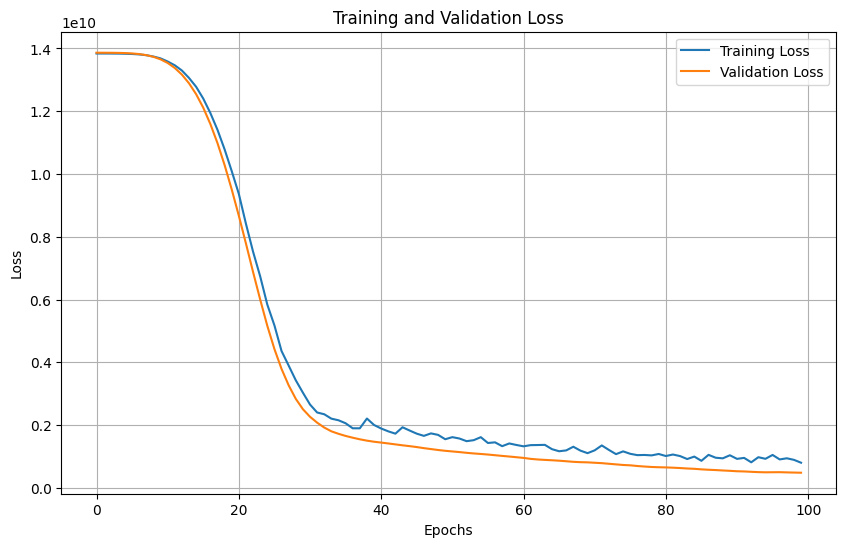

In [151]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [152]:
# Predict the median base salary for test data
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 5ms/step


In [153]:
# Convert the predicted values and actual values to a DataFrame for easy comparison
predictions = pd.DataFrame({'Predicted': y_pred.flatten(), 'Actual': y_test})

# Print the predicted values alongside the actual values
print(predictions)

         Predicted    Actual
459  116600.156250  109900.0
84   126056.312500  146400.0
440  120698.617188   77300.0
481   70998.117188   83100.0
434  103903.640625  116300.0
..             ...       ...
319  114991.812500  138700.0
382  117355.101562  111100.0
56   108010.164062  131700.0
276  139603.359375  103600.0
404  126342.328125  106300.0

[98 rows x 2 columns]


In [154]:
# Save the model
model.save("base_salary_predict.h5")